In [20]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap'] = 'gray'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:

import keras

import os
import datasets
import models
dataset="cluttered_mnist"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


print(input_shape)


Loading Cluttered MNIST from folder /tmp/cluttered-mnist/cluttered-mnist-npz4
x_train shape: (50000, 60, 60, 1)
y_train shape: (50000, 10)
x_test shape: (10000, 60, 60, 1)
y_test shape: (10000, 10)
(60, 60, 1)


In [27]:

lr=0.002

model = models.lecun_stn(input_shape,num_classes,filters=64)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
print(model.summary())
print(model.name)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spatial_transformer_13 (Spat (None, 60, 60, 1)         243894    
_________________________________________________________________
all_conv (Sequential)        (None, 10)                4415760   
Total params: 4,659,654
Trainable params: 4,657,990
Non-trainable params: 1,664
_________________________________________________________________
None
allconv_stn


In [28]:


#rotated_model = models.lecun_stn(input_shape,num_classes,cardinality,bottleneck_filters,initial_filters)
rotated_model = models.lecun_stn(input_shape,num_classes,filters=64)
rotated_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
print(rotated_model.summary())
print(rotated_model.name)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spatial_transformer_14 (Spat (None, 60, 60, 1)         243894    
_________________________________________________________________
all_conv (Sequential)        (None, 10)                4415760   
Total params: 4,659,654
Trainable params: 4,657,990
Non-trainable params: 1,664
_________________________________________________________________
None
allconv_stn


Training model with unrotated dataset...
Epoch 1/30
391/390 [==============================] - 42s 107ms/step - loss: 0.7879 - acc: 0.7418 - val_loss: 14.3385 - val_acc: 0.0997
Epoch 2/30
391/390 [==============================] - 39s 99ms/step - loss: 0.1555 - acc: 0.9511 - val_loss: 13.7060 - val_acc: 0.1119
Epoch 3/30
391/390 [==============================] - 39s 100ms/step - loss: 0.0706 - acc: 0.9778 - val_loss: 12.7619 - val_acc: 0.1172
Epoch 4/30
391/390 [==============================] - 39s 100ms/step - loss: 0.0384 - acc: 0.9887 - val_loss: 12.0742 - val_acc: 0.1628
Epoch 5/30
391/390 [==============================] - 39s 100ms/step - loss: 0.0242 - acc: 0.9928 - val_loss: 14.4030 - val_acc: 0.0989
Epoch 6/30
391/390 [==============================] - 39s 100ms/step - loss: 0.0242 - acc: 0.9927 - val_loss: 14.3073 - val_acc: 0.1001
Epoch 7/30
391/390 [==============================] - 39s 100ms/step - loss: 0.0235 - acc: 0.9924 - val_loss: 3.5755 - val_acc: 0.3900
Epoch 8/3

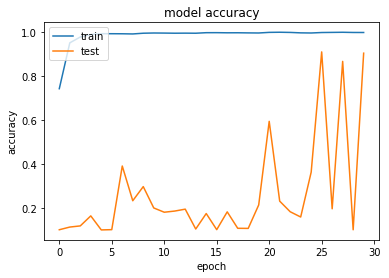

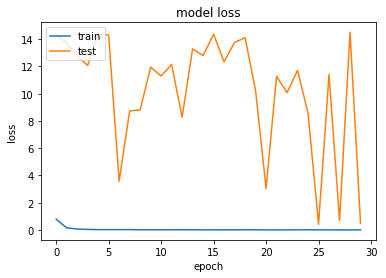

Training rotated model with rotated dataset...
Epoch 1/30
391/390 [==============================] - 41s 106ms/step - loss: 2.3208 - acc: 0.1309 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 2/30
391/390 [==============================] - 38s 97ms/step - loss: 2.3016 - acc: 0.1135 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 3/30
391/390 [==============================] - 38s 98ms/step - loss: 2.3017 - acc: 0.1136 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 4/30
391/390 [==============================] - 38s 97ms/step - loss: 2.3016 - acc: 0.1135 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 5/30
391/390 [==============================] - 38s 97ms/step - loss: 2.3016 - acc: 0.1135 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 6/30
391/390 [==============================] - 38s 98ms/step - loss: 2.3018 - acc: 0.1125 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 7/30
391/390 [==============================] - 38s 97ms/step - loss: 2.3017 - acc: 0.1127 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 8

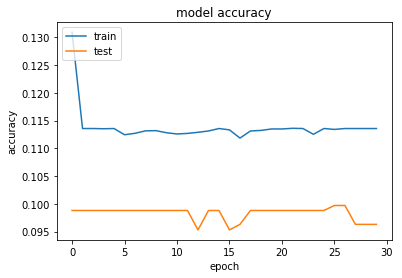

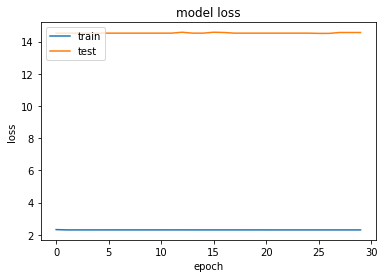

Testing both models on both datasets...


In [29]:
import experiment
batch_size = 128
epochs=30
rotated_epochs=30
scores=experiment.train_rotated(model,rotated_model,x_train,y_train,x_test,
                          y_test,num_classes,input_shape,batch_size,epochs,rotated_epochs)

In [30]:
from datetime import datetime

output_file="results/results_stn.txt"
f= open(output_file,"a+")
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
f.write(general_message)
print(general_message)
for k,v in scores.items():
    message='%s score: loss=%f, accuracy=%f\n' % (k,v[0],v[1])
    print(message)
    f.write(message)
f.write("\n\n")    
f.close()

2018-04-27 23:26:03.037134
Results on dataset cluttered_mnist with model allconv_stn and rotated model allconv_stn

rotated_model_test_dataset score: loss=14.565923, accuracy=0.096300

rotated_model_rotated_test_dataset score: loss=14.565922, accuracy=0.096300

rotated_model_train_dataset score: loss=14.559153, accuracy=0.096720

rotated_model_rotated_train_dataset score: loss=14.559153, accuracy=0.096720

model_test_dataset score: loss=0.479814, accuracy=0.904000

model_rotated_test_dataset score: loss=6.472604, accuracy=0.358800

model_train_dataset score: loss=0.147245, accuracy=0.955920

model_rotated_train_dataset score: loss=6.413525, accuracy=0.361920



In [ ]:
# visualize first layer
#https://github.com/oarriaga/spatial_transformer_networks/blob/master/src/mnist_cluttered_example.ipynb


#also check
#http://docplayer.net/amp/65274209-Tied-spatial-transformer-networks-for-character-recognition.html